In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "grid"])
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.7
})

In [7]:
def sens_feat(phi, X):
    rotation_matrix = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
    return X @ rotation_matrix

def cos_sim(x,y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

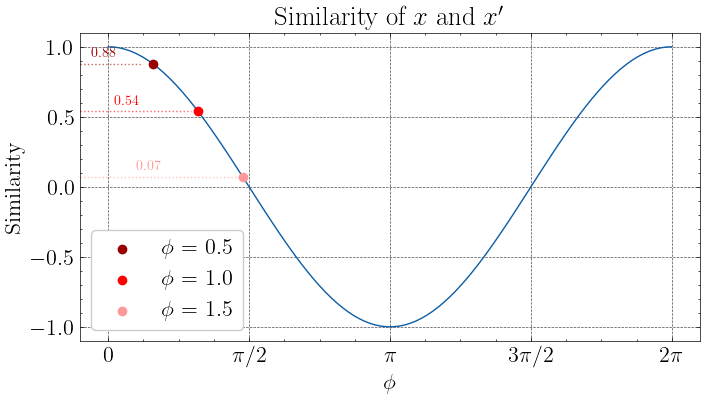

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and phi values
x = np.array([2, 3])
phi_values = np.linspace(0, 2*np.pi, 100)

# Compute similarity and absolute similarity
similarity = [cos_sim(sens_feat(phi, x), x) for phi in phi_values]
abs_similarity = [abs(cos_sim(sens_feat(phi, x), x)) for phi in phi_values]

# Define target phi values
phi_targets = [0.5, 1, 1.5]
similarity_targets = [cos_sim(sens_feat(phi, x), x) for phi in phi_targets]
abs_similarity_targets = [abs(sim) for sim in similarity_targets]

reds = ['#990000', '#FF0000', '#FF9999']

# --- Plot 1: Similarity ---
plt.figure(figsize=(8, 4))
plt.plot(phi_values, similarity)
for i, (phi_t, sim_t) in enumerate(zip(phi_targets, similarity_targets)):
    plt.scatter(phi_t, sim_t, color=reds[i], zorder=3, label=fr'$\phi$ = {phi_t:.1f}')
    plt.axhline(y=sim_t, xmin=0, xmax=phi_t/(2*np.pi)+0.02, color=reds[i], linestyle='dotted', alpha=0.6)
    plt.text(phi_t/2 - 0.3, sim_t + 0.05, f'{sim_t:.2f}', color=reds[i], fontsize=10, ha='center')

plt.xlabel(r'$\phi$')
plt.ylabel('Similarity')
plt.title(r'Similarity of $x$ and $x^{\prime}$')
plt.xticks([0, 1/2*np.pi, np.pi, 3/2*np.pi, 2*np.pi], ['0', r'$\pi$/2', r'$\pi$', r'3$\pi$/2', r'2$\pi$'])
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.savefig("../img/Used_In_MT/similarity.png", dpi=600, bbox_inches="tight")
plt.show()

